# Full recon

In [1]:


from acevedo_clss_and_fcns import * 
import itertools



edge_weights = pd.read_parquet("./results/data/data_for_R/Masked_ALL_edges_node_names_explainer_subgraphs.parquet.gzip")


edge_list = []

for i, r in edge_weights[["node1","node2"]].iterrows():
    edge_list.append((r[0],r[1]))
    
G = nx.Graph()
G.add_edges_from(edge_list)  

assert nx.is_connected(G)
metabolites = pd.read_csv("./results/data/metabolite_names.csv").Recon3_ID
metabolites = metabolites[[m in list(G.nodes) for m in metabolites]].tolist()


assert set(metabolites).issubset(set(list(G.nodes)))


size_feature = dict(zip(G, itertools.repeat(1)))


/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

size_metabolites = 10

size_feature.update(dict(zip(metabolites, itertools.repeat(size_metabolites))))
assert size_feature[metabolites[0]] == size_metabolites
nx.set_node_attributes(G, size_feature, "size")
assert G.nodes[metabolites[0]]['size']== size_metabolites


nx.write_graphml(G,  "./results/graphs_from_PYG_and_NX/full_recon_2.graphml")
nx.write_gexf(G, "./results/graphs_from_PYG_and_NX/full_recon_2.gexf")

In [ ]:

from graph_tool import *
from graph_tool.draw import * 
import matplotlib
GT    = load_graph( "./results/graphs_from_PYG_and_NX/full_recon_2.graphml")




pos = sfdp_layout(GT,  C=1,p=2,  theta= .005, r = 9)
graph_draw(GT, pos = pos, bg_color = 'white', 
           output = "./results/figures/tests/hola.png",
           output_size = (100, 100),
           fmt = 'png',
           
           #edge_pen_width = GT._Graph__edge_properties.weights, 
           #edge_color= GT._Graph__edge_properties.weights, 
           vertex_size= GT._Graph__vertex_properties.size,
           adjust_aspect = True, fit_view_ink = True,
           vcmap=matplotlib.cm.PuBu,
           ecmap=matplotlib.cm.PuBu)





# Non masked

In [ ]:
from acevedo_clss_and_fcns import * 


#edge_weights = pd.read_parquet("./results/data/data_for_R/Non_masked_ALL_edges_node_names_explainer_subgraphs.parquet.gzip")


edge_weights =  pd.read_csv("./results/data/data_for_R/Non_masked_edges_node_names_explainer_subgraphs.csv").drop('Unnamed: 0', axis =1)

#nx_G = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")



In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
edge_list = []

for i, r in edge_weights[["node1","node2"]].iterrows():
    edge_list.append((r[0],r[1]))
    
G = nx.Graph()
G.add_edges_from(edge_list)  

scaler = MinMaxScaler(feature_range=(1, 5))


#weights = list(preprocessing.normalize(np.array((edge_weights.select_dtypes(include=np.number).sum(axis=1))).reshape(-1, 1)).squeeze())
weights = list(scaler.fit_transform(
    np.array(edge_weights.select_dtypes(include=np.number).sum(axis=1)).reshape(-1, 1)).squeeze()
)
w  = dict(zip(G.edges() , weights))


nx.set_edge_attributes(G, w, "weights")

#bb = nx.edge_betweenness_centrality(G, normalized=False)

#nx.set_edge_attributes(G, bb, "betweenness")


In [4]:
list(G.edges(data=True))[0]


('r1643', 'asn_L_c', {'weights': 1.1410863106199587})

In [5]:

nx.write_graphml(G,  "./results/graphs_from_PYG_and_NX/geeksforgeeks.graphml")
##nx.write_gexf(G, "./results/graphs_from_PYG_and_NX/geeksforgeeks.gexf")

In [6]:
from graph_tool import *
from graph_tool.draw import * 
import matplotlib
GT    = load_graph( "./results/graphs_from_PYG_and_NX/geeksforgeeks.graphml")



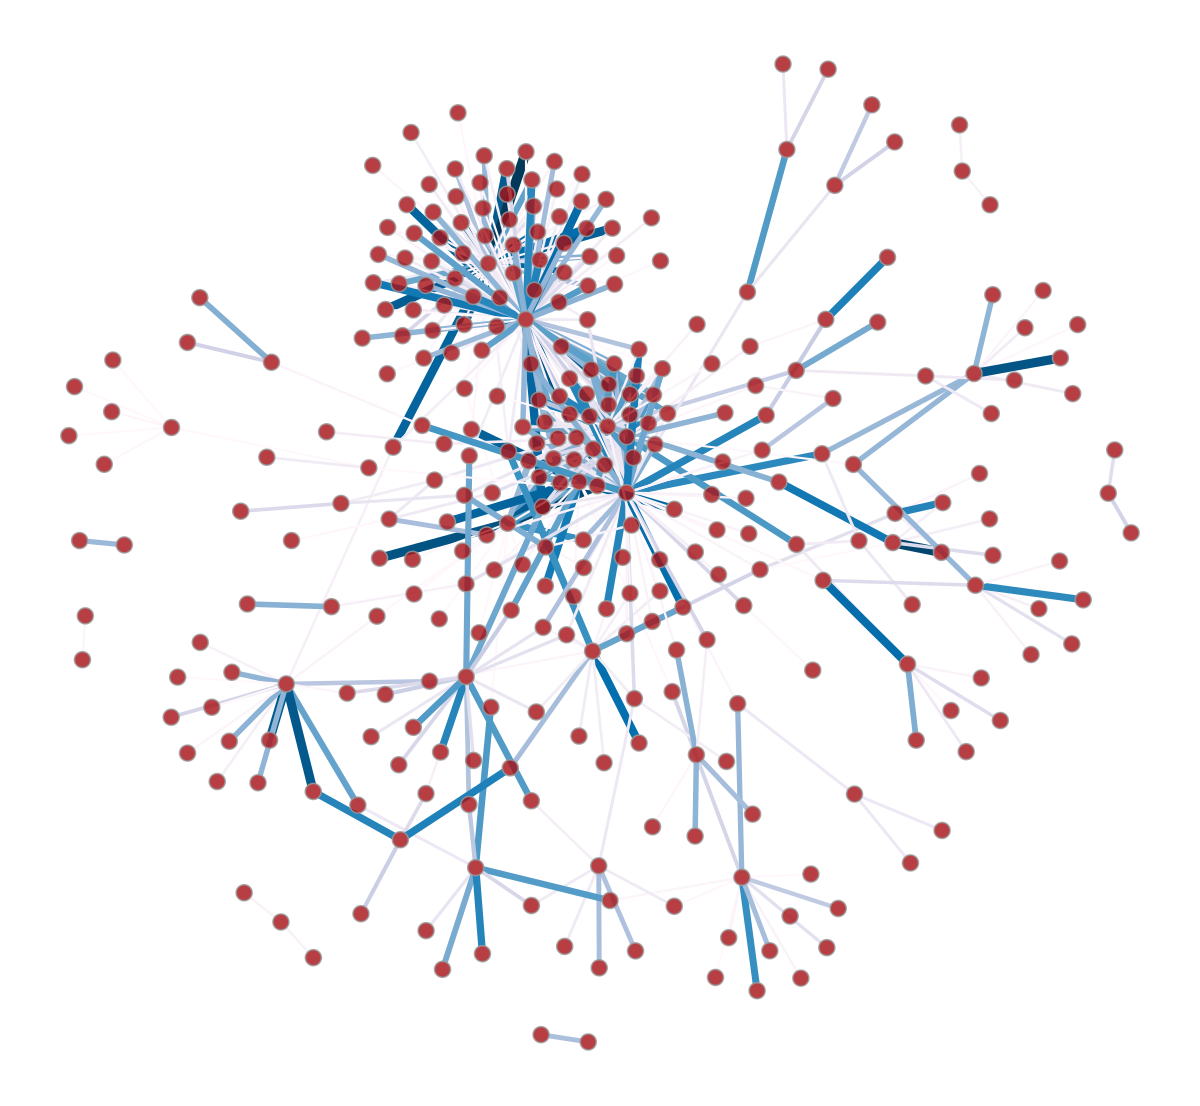

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7efc4b928370, at 0x7efbfc06bf10>

In [7]:
pos = sfdp_layout(GT,  C=1,p=2,  theta= .005, r = 9)
graph_draw(GT, pos = pos, bg_color = 'white', edge_pen_width = GT._Graph__edge_properties.weights, 
           edge_color= GT._Graph__edge_properties.weights, vertex_size= 8,
           adjust_aspect = True, fit_view_ink = True,
           vcmap=matplotlib.cm.PuBu,
           ecmap=matplotlib.cm.PuBu)

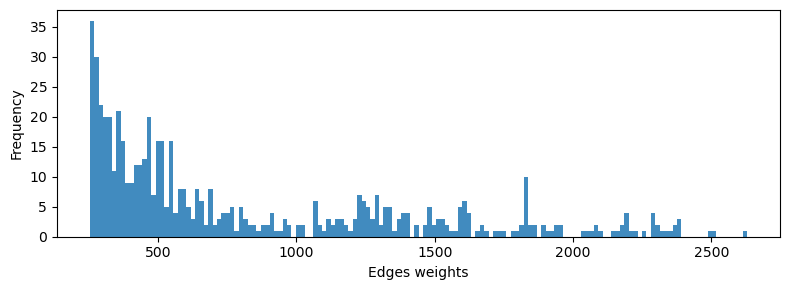

In [14]:

edge_weights.select_dtypes(include=np.number).sum(axis=1).plot.hist(logy = False, figsize=(8,3),
                                                                    bins=150, alpha=0.85)



plt.xlabel('Edges weights') 
#plt.ylabel(None)
#plt.ylabel("common Y")
#fig.supylabel('common y label')
plt.tight_layout()
plt.show()

# Masked

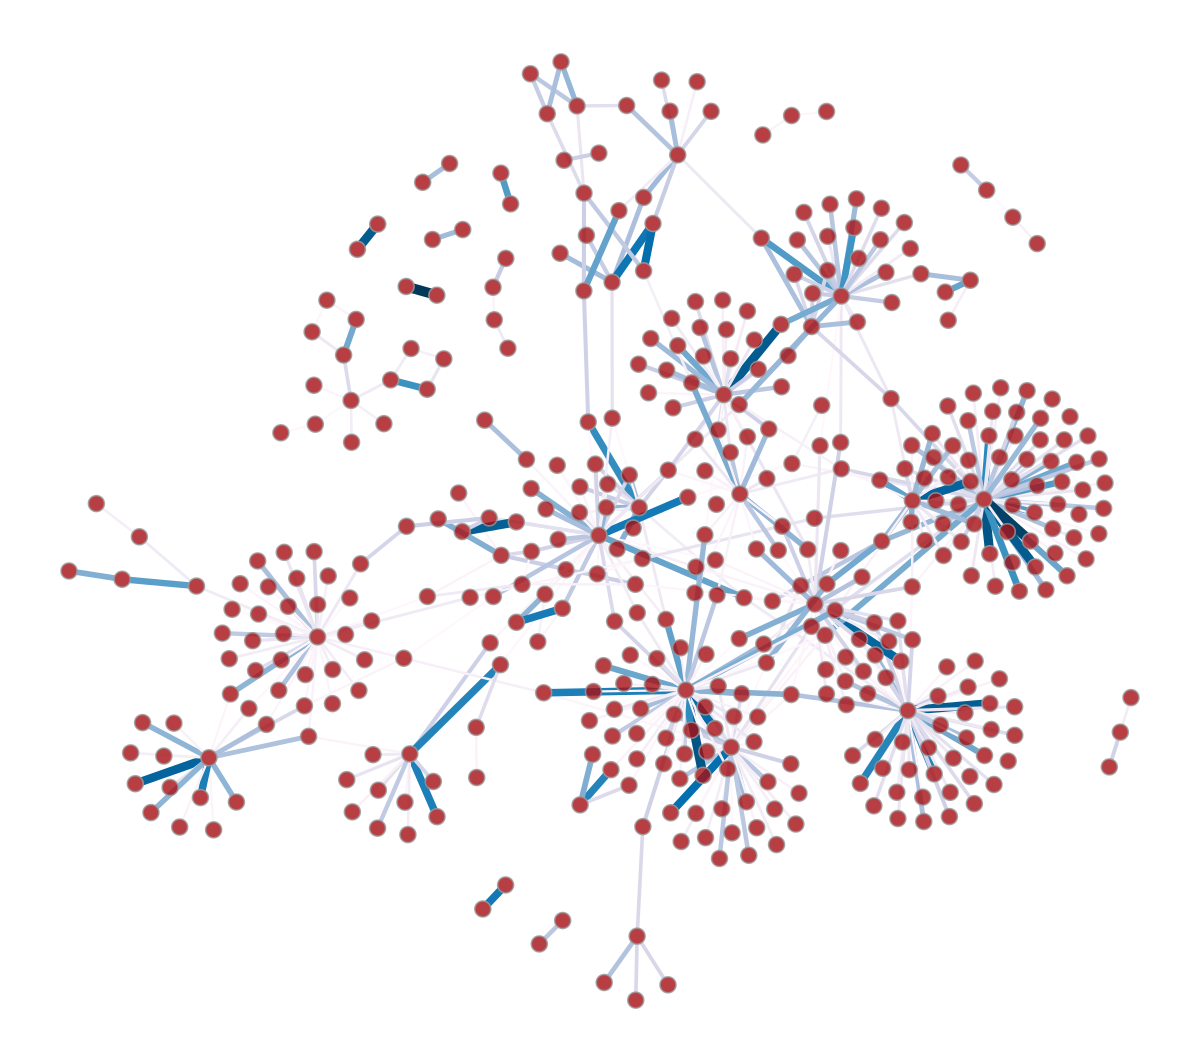

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb6486ff280, at 0x7fb540bb9970>

In [2]:
from acevedo_clss_and_fcns import * 
edge_weights =  pd.read_csv("./results/data/data_for_R/Masked_edges_node_names_explainer_subgraphs.csv").drop('Unnamed: 0', axis =1)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
edge_list = []

for i, r in edge_weights[["node1","node2"]].iterrows():
    edge_list.append((r[0],r[1]))
    
G = nx.Graph()
G.add_edges_from(edge_list)  

scaler = MinMaxScaler(feature_range=(1, 5))


#weights = list(preprocessing.normalize(np.array((edge_weights.select_dtypes(include=np.number).sum(axis=1))).reshape(-1, 1)).squeeze())
weights = list(scaler.fit_transform(
    np.array(edge_weights.select_dtypes(include=np.number).sum(axis=1)).reshape(-1, 1)).squeeze()
)
w  = dict(zip(G.edges() , weights))


nx.set_edge_attributes(G, w, "weights")

nx.write_graphml(G,  "./results/graphs_from_PYG_and_NX/geeksforgeeks.graphml")
from graph_tool import *
from graph_tool.draw import * 
import matplotlib
GT    = load_graph( "./results/graphs_from_PYG_and_NX/geeksforgeeks.graphml")
pos = sfdp_layout(GT,  C=1,p=2,  theta= .005, r = 9)
graph_draw(GT, pos = pos, bg_color = 'white', edge_pen_width = GT._Graph__edge_properties.weights, 
           edge_color= GT._Graph__edge_properties.weights, vertex_size= 8,
           adjust_aspect = True, fit_view_ink = True,
           vcmap=matplotlib.cm.PuBu,
           ecmap=matplotlib.cm.PuBu)


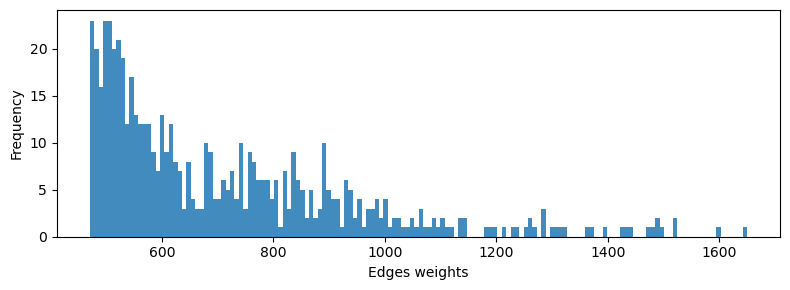

In [3]:
edge_weights.select_dtypes(include=np.number).sum(axis=1).plot.hist(logy = False, figsize=(8,3),
                                                                    bins=150, alpha=0.85)



plt.xlabel('Edges weights') 
#plt.ylabel(None)
#plt.ylabel("common Y")
#fig.supylabel('common y label')
plt.tight_layout()
plt.show()